In [1]:
from rdkit import Chem
from pathlib import Path 
import rdkit

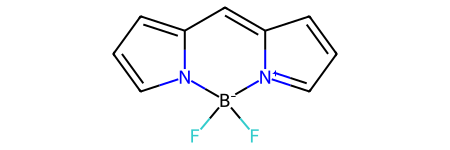

In [2]:
#smile='C1=CSC=N1'
smile = '[B-]1(n2cccc2C=C3[N+]1=CC=C3)(F)F'
smi_key='BODIPY'
mol_rdkit = Chem.MolFromSmiles(smile)
mol_rdkit

In [3]:
import py3Dmol 

In [4]:
 # Verify if the "data2402_{smi_key}" subdirectory exist and if not, create it
working_dir = Path(f'./data2406/{smi_key}')
# Create the output directory if it doesn't exist
working_dir.mkdir(parents=True, exist_ok=True)


In [5]:

def view3D(mol, label, fmt='mol'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)       # visualiser la molécule avec une largeur de ''400'' et hauteur de ''400''

        if fmt=='mol':                                   # si le format des 'mol',
            view.addModel(Chem.MolToMolBlock(mol), fmt)     # generer les coordonnes de a molecule dans un block
            # view.addModel(mol, fmt)
        elif fmt=='xyz':                                      # sinon 
            view.addModel(mol, fmt)                             # generer les coordonnes en xyz

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})     # définir le style de représentation de la molécule, avec des bâtons pour les liaisons et des sphères pour les atomes avec une échelle de '30'
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}}) # ajouter une etiquette de visualisation dont les coordonnées sont x,y,z

        view.zoomTo()
        view.show()

### Meilleure conformation

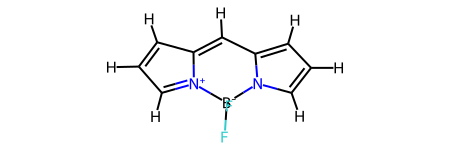

In [6]:
from rdkit.Chem import AllChem

# Add explicit Hs
mol_rdkit = Chem.AddHs(mol_rdkit)    #   Ajouter les atomes d'hydrogene a la molécule

# Generates the initial 3D conformation of the molecule
AllChem.EmbedMolecule(mol_rdkit)
mol_rdkit

### Visualisation 3D

In [7]:
# 3D visualization
mol_rdkit0 = mol_rdkit                    #crée une nouvelle variable mol_rdkit0 qui est une copie de mol_rdkit.
                                           #Cette copie est nécessaire pour la visualisation 3D, car la fonction view3D() modifie l'objet molécule passé en argument.

view3D(mol_rdkit0, f'{smi_key} RDKit Molecule')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [8]:
# Convert RDKit molecule to XYZ format 
mol_xyz0 = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
print(mol_xyz0)

21

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211



### Préoptimisation avec RDKIT 
#### Visualisation 3D

In [9]:
from rdkit.Chem import AllChem

# Optimizes the 3D conformation of the molecule using MMFF - Merck Molecular Force Field
AllChem.MMFFOptimizeMolecule(mol_rdkit, maxIters=200, mmffVariant="MMFF94s")   # utiliser 200 itérations et la variante MMFF94s

#Canonicalize the orientation of the conformation
Chem.rdMolTransforms.CanonicalizeMol(mol_rdkit, normalizeCovar=True, ignoreHs=False)

# 3D visualization
mol_rdkit1 = mol_rdkit
view3D(mol_rdkit1, f'{smi_key} RDKit Molecule MMFF94')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
# Setting various paths for files
path_xtb_xyz = working_dir / f'{smi_key}_opt.xyz'
path_xtb_log = working_dir / f'{smi_key}_opt.log'
path_rdkit_xyz = working_dir / f'{smi_key}_rdkit.xyz'

# Convert RDKit molecule to XYZ format 
mol_xyz = Chem.MolToXYZBlock(mol_rdkit)    # Convertir  la molecule format XYZ 
with open("mol_rdkit.xyz", "w") as f:
    f.write(mol_xyz)

### Optimisation avec xTB et CREST

In [10]:
%%bash
# Pré-optimisation avec xTB
xtb mol_rdkit.xyz --gfn 2 --opt vtight --parallel 2 > xtb1.out

# Best conformation search with CREST
crest xtbopt.xyz -gff -mquick --noreftopo

# xTB geometry optimization of the crest best conformation
xtb crest_best.xyz --gfn 2 --opt vtight --parallel 2 > xtb2.out

B      0.077540   -1.260063    0.662168
N      1.287298   -0.512080    0.167762
C      2.610063   -0.872251    0.256071
C      3.376476    0.106602   -0.326730
C      2.477341    1.052924   -0.761252
C      1.191909    0.660042   -0.450475
C     -0.110072    1.302633   -0.691166
C     -1.226323    0.718760   -0.291707
N     -1.210933   -0.517100    0.366848
C     -2.465701   -0.871538    0.654737
C     -3.367151    0.157580    0.176219
C     -2.649449    1.109206   -0.388242
F      0.167736   -1.384240    2.127318
F     -0.008884   -2.602113    0.071666
H      2.928855   -1.787844    0.719808
H      4.459867    0.107265   -0.412239
H      2.746806    1.974054   -1.274174
H     -0.159997    2.257776   -1.197146
H     -2.712431   -1.798886    1.169208
H     -4.447832    0.134476    0.273536
H     -2.965119    2.024799   -0.852211


In [ ]:
import subprocess as sp

# Store various files 
sp.run(['cp', 'xtbopt.xyz', path_xtb_xyz], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
sp.run(['mv', 'xtb2.out', path_xtb_log], stdout=sp.DEVNULL, stderr=sp.DEVNULL)
sp.run(['mv', 'mol_rdkit.xyz', path_rdkit_xyz], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

# Deleted various TB files before the next optimization calculations
sp.run(['rm', 'bondlengths', 'charges', 'coord', 'coord.original', 'cregen_0.tmp', 'cregen_1.tmp', 'xtb1.out',
        'cre_members', 'crest_best.xyz', 'crest_conformers.xyz', 'crest.energies', 'crest_rotamers.xyz', 
        'gfnff_charges', 'gfnff_topo', '.history.xyz', 'struc.xyz', 'wbo','xtbopt.xyz', 'xtbopt.log', '.xtboptok', 
        'xtbrestart', 'xtbtopo.mol', 'xtblast.xyz', 'gfnff_adjacency'], stdout=sp.DEVNULL, stderr=sp.DEVNULL)

In [ ]:
from rdkit.Chem import AllChem

# Calculate the RMSD to evaluate the optimally (minimum RMSD) alignment of mol_rdkit1  with mol_xtb
mol1 = Chem.MolFromXYZFile(f'{path_rdkit_xyz}')
mol2 = Chem.MolFromXYZFile(f'{path_xtb_xyz}')
AllChem.AlignMol(mol1, mol2)

### Creation de l'objet mole

In [11]:
from tangelo import SecondQuantizedMolecule as SQMol
from tangelo.helpers.utils import is_package_installed

# Remove the first two lines (number of atoms and empty line) from XYZ data
mol_xyz1 = '\n'.join(path_xtb_xyz.read_text().strip().split('\n')[2:]) 

BODIPY_def2svp = SQMol(mol_xyz1, q=0, spin=0, basis="def2-SVP", symmetry=True)
print(f"active molecular orbitals : {BODIPY_def2svp.n_active_mos} ")
print(f"active electrons : {BODIPY_def2svp.n_active_electrons} ")

# objet mol pour l'etat triplet
BODIPY_def2svp_t = SQMol(mol_xyz1, q=0, spin=2, basis="def2-SVP", symmetry=True)


In [ ]:
import plotly.express as px

# Plot the MO Occupations
fig = px.line(y=BODIPY_def2svp.mo_occ, markers=True, title="Molecular Orbital (MO) Occupations")
fig.update_layout(xaxis_title="Orbital Index (0-Based)", yaxis_title="MO Occupation")
fig.show()

In [ ]:
# Plot the MO Energies (i.e. eigenvalues of the Fock matrix)
fig = px.line(y=BODIPY_def2svp.mo_energies, markers=True, title="Molecular Orbital (MO) Energies (a.u.)")
fig.update_layout(xaxis_title="Orbital Index (0-Based)", yaxis_title="MO Energies (a.u.)")
fig.show()

In [ ]:
n_lumo = BODIPY_def2svp.mo_occ.tolist().index(0.)
n_homo = n_lumo - 1
print(f"indice homo : {n_homo} ")
print(f"indice lumo: {n_lumo} ")

print(f'le nombre orbitales moleculaire est :{BODIPY_def2svp.n_mos}')

indice homo : 48 
indice lumo: 49 
le nombre orbitales moleculaire est :231


In [ ]:
import dftd4.pyscf as disp
from pyscf import solvent

mf = BODIPY_def2svp.mean_field

# Utiliser la méthode "ddCOSMO" de l'objet "solvent"
mf = mf.run().ddCOSMO()
mf.with_solvent.eps = 2.3741   # Toluene
mf = disp.energy(mf).run()


mf_t = BODIPY_def2svp_t.mean_field
mf_t = mf_t.run().ddCOSMO()
mf_t.with_solvent.eps = 2.3741   # Toluene
mf_t = disp.energy(mf_t).run()

In [ ]:
mf.dump_scf_summary()

**** SCF Summaries ****
Total Energy =                        -677.076107991188792
Nuclear Repulsion Energy =             861.257970215010346
One-electron Energy =                -2638.316418247129150
Two-electron Energy =                 1099.994999565999024
Empirical Dispersion Energy =           -0.097806137899433


### Hamiltonien

In [ ]:
from tangelo.toolboxes.molecular_computation.frozen_orbitals import get_orbitals_excluding_homo_lumo

# Selecting HOMO-0 to LUMO+0 orbitals.
frozen = get_orbitals_excluding_homo_lumo(BODIPY_def2svp, homo_minus_n=0, lumo_plus_n=0)

BODIPY_def2svp_frozen = SQMol(mol_xyz1, q=0, spin=0,
                                            basis="def2-SVP",
                                            frozen_orbitals=frozen, symmetry=True)
BODIPY_def2svp_frozen_t = SQMol(mol_xyz1, q=0, spin=2,
                                            basis="def2-SVP",
                                            frozen_orbitals=frozen, symmetry=True)
print(f"{BODIPY_def2svp_frozen.n_active_mos} active molecular orbitals")
print(f"{BODIPY_def2svp_frozen.n_active_electrons} active electrons")
print(f"{BODIPY_def2svp_frozen.active_mos} is the active space")

2 active molecular orbitals
2 active electrons
[48, 49] is the active space


: 

In [ ]:
from tangelo.toolboxes.qubit_mappings.mapping_transform import fermion_to_qubit_mapping
from tangelo.toolboxes.operators import count_qubits
from tangelo.toolboxes.operators.taper_qubits import QubitTapering

#singulet
hamiltonian = fermion_to_qubit_mapping(BODIPY_def2svp_frozen.fermionic_hamiltonian, "JW")
n_qubits = count_qubits(hamiltonian)
taper = QubitTapering(hamiltonian, n_qubits,
                      n_electrons=BODIPY_def2svp_frozen.n_active_electrons)
hamiltonian_taper = taper.z2_tapered_op
n_qubits_tapered = count_qubits(hamiltonian_taper)

print(f"Number of qubits: {n_qubits}")
print(f"Number of qubits after tapering: {n_qubits_tapered}")
print(f"{n_qubits - n_qubits_tapered} Z2 symmetries detected")


In [ ]:
# triplet
hamiltonian_t = fermion_to_qubit_mapping(BODIPY_def2svp_frozen_t.fermionic_hamiltonian, "JW")
n_qubits_t = count_qubits(hamiltonian_t)
taper_t = QubitTapering(hamiltonian_t, n_qubits_t,
                      n_electrons=BODIPY_def2svp_frozen_t.n_active_electrons)
hamiltonian_taper_t = taper_t.z2_tapered_op
n_qubits_tapered_t = count_qubits(hamiltonian_taper_t)

print(f"Number of qubits t: {n_qubits_t}")
print(f"Number of qubits t after tapering: {n_qubits_tapered_t}")
print(f"{n_qubits_t - n_qubits_tapered_t} Z2 symmetries t detected")


### Calcul VQE

In [ ]:
from tangelo.algorithms.variational import VQESolver, BuiltInAnsatze
from tangelo.algorithms.classical import FCISolver

# Dictionary of resources for each algorithm
algorithm_resources = dict()

# Ground state energy calculation with VQE, reference values with FCI
vqe_options = {"molecule": BODIPY_def2svp_frozen, "ansatz": BuiltInAnsatze.UCCSD}
vqe_solver = VQESolver(vqe_options)
vqe_solver.build()
vqe_energy = vqe_solver.simulate()
print("\n Ground Singlet state")
print(f"VQE energy = {vqe_energy}")
print(f"CASCI energy = {FCISolver(BODIPY_def2svp_frozen).simulate()}")
algorithm_resources["vqe_ground_state"] = vqe_solver.get_resources()

# First excited state energy calculation with VQE, reference values with FCI
vqe_options_t = {"molecule": BODIPY_def2svp_frozen_t, "ansatz": BuiltInAnsatze.UpCCGSD}
vqe_solver_t = VQESolver(vqe_options_t)
vqe_solver_t.build()
vqe_energy_t = vqe_solver_t.simulate()
print("\n Lowest triplet state")
print(f"VQE energy triplet = {vqe_energy_t}")
print(f"CASCI energy triplet = {FCISolver(BODIPY_def2svp_frozen_t).simulate()}")
algorithm_resources["vqe_triplet_state"] = vqe_solver_t.get_resources()


### VQE Deflation

This approach can be implented by using the deflation options built in the `VQESolver` class:

- The keyword `"deflation_circuits"` allows the user to provide a list of circuits to use in the deflation process.
- Additionally, the keyword `"deflation_coeff"` allows a user to specify the weight in front of the penalty term. This coefficient must be larger than the difference in energy between the ground and the target excited state.

In [ ]:
# Add initial VQE optimal circuit to the deflation circuits list
deflation_circuits = [vqe_solver.optimal_circuit.copy()]

# Calculate first and second excited states by adding optimal circuits to deflation_circuits
for i in range(2):
    vqe_options = {"molecule": BODIPY_def2svp_frozen, "ansatz": BuiltInAnsatze.UpCCGSD, 
                   "deflation_circuits": deflation_circuits, "deflation_coeff": 0.4}
    vqe_solver = VQESolver(vqe_options)
    vqe_solver.build()
    vqe_energy = vqe_solver.simulate()
    print(f"Excited state #{i+1} \t VQE energy = {vqe_energy}")
    algorithm_resources[f"vqe_deflation_state_{i+1}"] = vqe_solver.get_resources()

    deflation_circuits.append(vqe_solver.optimal_circuit.copy())

The deflation above generated the singlet states. Sometimes it is useful to use a different reference state. In the next example of deflation, we use a reference state with 2 alpha electrons and 0 beta electrons to calculate the triplet state. The reference state is defined by alternating up then down ordering, which yields `{"ref_state": [1, 0, 1, 0]}` for 2 alpha electrons in 2 orbitals for this situation.

In [ ]:
vqe_options = {"molecule": BODIPY_def2svp_frozen, "ansatz": BuiltInAnsatze.UpCCGSD, 
               "deflation_circuits": deflation_circuits,
               "deflation_coeff": 0.4, "ref_state": [1, 0, 1, 0]}
vqe_solver_triplet = VQESolver(vqe_options)
vqe_solver_triplet.build()
vqe_energy = vqe_solver_triplet.simulate()
print(f"VQE Excited energy = {vqe_energy}")
algorithm_resources[f"vqe_deflation_state_{3}"] = vqe_solver_triplet.get_resources()

### State-Averaged VQE 

Another method to obtain excited states is to use the State-Averaged VQE Solver (SA-VQE). SA-VQE minimizes the average energy of multiple orthogonal reference states using the same ansatz circuit. As the reference states are orthogonal, using the same circuit transformation (a unitary), results in final states that are also orthogonal. This idea can be found in [arXiv:2009.11417](https://arxiv.org/pdf/2009.11417.pdf).

Here, we target singlet states only. This can be accomplished by adding a penalty term with `"penalty_terms": {"S^2": [2, 0]}`. This means that the target Hamiltonian to be minimized is $H = H_0 + 2 (\hat{S}^2 - 0)^2$, where $H_0$ is the original molecular Hamiltonian.

In [ ]:
from tangelo.algorithms.variational import SA_VQESolver

vqe_options = {"molecule": BODIPY_def2svp_frozen, "ref_states": [[1,1,0,0], [1,0,0,1], [0,0,1,1]],
               "weights": [1, 1, 1], "penalty_terms": {"S^2": [2, 0]},
               "qubit_mapping": "jw", "ansatz": BuiltInAnsatze.UpCCGSD,
               }
vqe_solver = SA_VQESolver(vqe_options)
vqe_solver.build()
enernew = vqe_solver.simulate()
for i, energy in enumerate(vqe_solver.state_energies):
    print(f"Singlet State {i} has energy {energy}")

algorithm_resources["sa_vqe"] = vqe_solver.get_resources()

The energies above are inaccurate, as the calculated states are restricted to linear combinations of the three lowest singlet states. We can use MC-VQE to generate the exact eigenvectors, as shown in the next section.

However, the cell below shows the $\hat{S}^2$ expectation value is nearly zero for all states, so they are all singlet as expected when using the penalty term.

In [ ]:
from tangelo.toolboxes.ansatz_generator.fermionic_operators import spin2_operator
from tangelo.toolboxes.qubit_mappings.mapping_transform import fermion_to_qubit_mapping as f2q_mapping


s2op = f2q_mapping(spin2_operator(2), "jw")
for i in range(3):
    print(f"State {i} has S^2 = {vqe_solver.backend.get_expectation_value(s2op, vqe_solver.reference_circuits[i]+vqe_solver.optimal_circuit)}")


#### State-Averaged VQE with deflation 

We can obtain the final excited state by using deflation for the three singlet states above and removing the penalty term. We define a reference state with `"ref_states": [[1, 0, 1, 0]]` that better targets the remaining triplet state. We can revert back to the UCCSD ansatz for this state as we do not need as expressive an ansatz anymore.

In [ ]:
vqe_options = {"molecule": BODIPY_def2svp_frozen, "ref_states": [[1, 0, 1, 0]],
               "weights": [1], "deflation_circuits": [vqe_solver.reference_circuits[i]+vqe_solver.optimal_circuit for i in range(3)],
               "qubit_mapping": "jw", "ansatz": BuiltInAnsatze.UCCSD,
               }
vqe_solver_deflate = SA_VQESolver(vqe_options)
vqe_solver_deflate.build()
enernew = vqe_solver_deflate.simulate()

for i, energy in enumerate(vqe_solver_deflate.state_energies):
    print(f"Triplet State {i} has energy {energy}")

algorithm_resources[f"sa_vqe_deflation"] = vqe_solver_deflate.get_resources()

This is the correct triplet state energy.

### State-Averaged Orbital-Optimized VQE

This performs the equivalent of a CASSCF calculation using a quantum computer. This approach runs multiple iterations comprised of the two following steps:

- SA-VQE calculation
- orbital optimization 

These iterations are called by using the `iterate()` call. The `simulate()` method from `SA_OO_Solver` only performs a State-Averated VQE simulation. The reference for this method is [arXiv:2009.11417](https://arxiv.org/pdf/2009.11417.pdf).

In [ ]:
from tangelo.algorithms.variational import SA_OO_Solver

BODIPY_def2svp_nosym = SQMol(mol_xyz1, q=0, spin=0, basis="def2-SVP",
                      frozen_orbitals=frozen, symmetry=False)
vqe_options = {"molecule": BODIPY_def2svp_nosym, "ref_states": [[1,1,0,0], [1,0,1,0]],
               "weights": [1, 1],
               "qubit_mapping": "jw", "ansatz": BuiltInAnsatze.UpCCGSD, "ansatz_options": {"k": 2}
               }
vqe_solver = SA_OO_Solver(vqe_options)
vqe_solver.build()
enernew = vqe_solver.iterate()
for i, energy in enumerate(vqe_solver.state_energies):
    print(f"State {i} has energy {energy}")

algorithm_resources["sa_oo_vqe"] = vqe_solver.get_resources()

### Classical excited state energies

Comparing the `SA_OO_VQE` solution to CASSCF calculations from a library such as pyscf shows similar results.

In [ ]:
from pyscf import mcscf

BODIPY_def2svp_no_sym_copy = SQMol(mol_xyz1, q=0, spin=0, basis="def2-SVP",
                      frozen_orbitals=frozen, symmetry=False)
mc = mcscf.CASSCF(BODIPY_def2svp_no_sym_copy.mean_field, 2, 2).state_average([0.5, 0.5])
mc = solvent.ddCOSMO(mc)
# Adjust solvent model by modifying the attribute .with_solvent
mc.with_solvent.eps = 2.3741  # Toluene dielectric constant
energy = mc.kernel()

In [ ]:
mc = mcscf.CASCI(BODIPY_def2svp.mean_field, 2, (1, 1))
mc = solvent.ddCOSMO(mc)
# Adjust solvent model by modifying the attribute .with_solvent
mc.with_solvent.eps = 2.3741  # Toluene dielectric constant
mc.fcisolver.nroots = 2
mc.kernel()[0]
